In [1]:
import ImageTest as imtest
import numpy as np
from projectConstants import *
import toolbox

In [2]:
class Chromosome:

    def __init__(self, data=None):
        if data is None :
            self.data = imtest.generateRandomImageData(1)
        else:
            self.data = data

    def __repr__(self):
        return imtest.dataToImage(self.data)

    def fitness(self):
        return imtest.fitness_function(self.data)

def mutate(p: Chromosome):
    # mutation in-place
    # select mutation type
    method = np.random.choice(['insertion', 'deletion', 'edition'],
                              p=[P_INSERTION, P_DELETION, P_EDITION])
    if method == 'insertion':
        # insert random entry
        p.data = np.append(p.data, imtest.generateRandomImageData(1))
    if method == 'deletion':
        if p.data.shape[0] // 10 > 1:
            # delete at random place
            r1 = np.random.randint(0, p.data.shape[0] // 10)
            p.data = np.delete(p.data, slice(r1 * 10, r1 * 10 + 10))
    if method == 'edition':
        # change random entry
        return
        r = np.random.randint(0, p.data.shape[0])
        if r % 10 < 6:
            p.data[r] = np.random.randint(0, HEIGHT)
        elif r % 10 != 9:
            p.data[r] = np.random.randint(0, 255)
        else:
            p.data[r] = np.random.randint(OPACITY_MIN, OPACITY_MAX + 1)


def crossover(p1: Chromosome, p2: Chromosome):
    data = np.concatenate((p1.data, p2.data))
    data_length = (data.shape[0]) // 10
    child1_length = data_length // 2
    choice = np.random.choice(data_length, size=child1_length, replace=False)
    belongs = np.array([False] * data_length)
    for i in choice:
        belongs[i] = True
    choice2 = []
    for (i, x) in enumerate(belongs):
        if not x:
            choice2 += [i]
    p1.data = np.concatenate(tuple(data[i * 10 : i * 10 + 10] for i in choice))
    p2.data = np.concatenate(tuple(data[i * 10 : i * 10 + 10] for i in choice2))

In [3]:
def save_population(population):
    np.save('population', population)

def load_population():
    return np.load("population.npy", allow_pickle=True)

In [4]:
population = np.array([Chromosome() for i in range(POPULATION_SIZE)])
print("ready to go")

ready to go


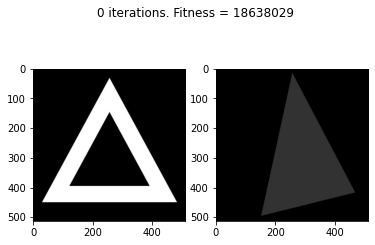

0
10
20
30
40
50
60
70
80
90
100


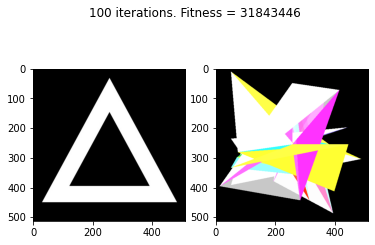

In [ ]:
for i in range(EPOCHS):
    # select individuals
    offspring = toolbox.select(population, len(population))
    # perform crossover
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if np.random.random() < P_CROSSOVER:
            crossover(child1, child2)
    # mutations
    for mutant in offspring:
        if np.random.random() < P_MUTATION:
            mutate(mutant)
    # update population
    population = np.copy(offspring)
    if i % 100 == 0:
        imtest.save_best_individual(population, i)
    if i % 10 == 0:
        print(i)
print('done.')